In [19]:
import pandas as pd
# Netflix viewing data
df = pd.read_csv("netflix-report/CONTENT_INTERACTION/ViewingActivity.csv")

In [20]:
# type initialization
df['Start Time'] = pd.to_datetime(df['Start Time'],utc=True)
df = df.set_index('Start Time')
df.index = df.index.tz_convert('CET')
df['Duration'] = pd.to_timedelta(df['Duration'])
df = df.reset_index()
df["Title"] = df["Title"].astype("string")
df["Profile Name"] = df["Profile Name"].astype("string")
df["Country"] = df["Country"].astype("string")
df["Device Type"] = df["Device Type"].astype("string")
df["Bookmark"] = pd.to_timedelta(df["Bookmark"])
df["Supplemental Video Type"] = df["Supplemental Video Type"].astype("string")
df["Attributes"] = df["Attributes"].astype("string")
df.shape

(27082, 10)

In [21]:
# remove the trailer and focus the analysis on my user profile
shows = df[(df['Duration'] > '0 days 00:01:00') & (df['Profile Name'] == 'Jean-ludovic')]
shows

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
4,2022-02-09 20:58:48+01:00,Jean-ludovic,0 days 00:01:02,<NA>,Bande-annonce : The Privilege,TRAILER,DefaultWidevineAndroidPhone,0 days 00:01:01,00:01:01,FR (France)
8,2022-02-09 12:53:49+01:00,Jean-ludovic,0 days 00:48:07,<NA>,All of Us Are Dead: Saison 1: Épisode 3 (Épiso...,<NA>,DefaultWidevineAndroidPhone,0 days 00:56:25,00:56:25,FR (France)
10,2022-02-08 14:00:56+01:00,Jean-ludovic,0 days 00:22:54,<NA>,All of Us Are Dead: Saison 1: Épisode 2 (Épiso...,<NA>,DefaultWidevineAndroidPhone,0 days 01:04:19,01:04:19,FR (France)
13,2022-02-08 07:43:50+01:00,Jean-ludovic,0 days 00:14:03,<NA>,JoJo's Bizarre Adventure: Stardust Crusaders: ...,<NA>,DefaultWidevineAndroidPhone,0 days 00:00:00,00:00:00,FR (France)
14,2022-02-08 05:53:52+01:00,Jean-ludovic,0 days 00:06:13,<NA>,JoJo's Bizarre Adventure: Stardust Crusaders: ...,<NA>,DefaultWidevineAndroidPhone,0 days 00:05:20,00:05:20,FR (France)
...,...,...,...,...,...,...,...,...,...,...
25051,2016-09-17 21:59:27+02:00,Jean-ludovic,0 days 00:02:22,<NA>,Teen Wolf: Saison 5: Menace imminente (Épisode...,<NA>,Apple iPhone 6,0 days 00:02:02,Not latest view,FR (France)
25053,2016-09-17 21:36:15+02:00,Jean-ludovic,0 days 00:21:01,<NA>,Family Guy: Saison 9: En route pour le pôle No...,<NA>,Apple iPhone 6,0 days 00:21:02,00:21:02,FR (France)
25054,2016-09-17 21:08:03+02:00,Jean-ludovic,0 days 00:21:35,<NA>,"Modern Family: Saison 6: Phil, le robot (Épiso...",<NA>,Apple iPhone 6,0 days 00:21:37,00:21:37,FR (France)
25056,2016-09-17 20:38:48+02:00,Jean-ludovic,0 days 00:20:51,<NA>,Blue Mountain State: Saison 3: Photos anonymes...,<NA>,Apple iPhone 6,0 days 00:20:52,00:20:52,FR (France)


In [22]:
# total viewing time of all shows
shows['Duration'].sum()

Timedelta('302 days 08:40:34')

In [23]:
tvshow = input("For which serie or movie do you want to learn more about yourself ?")
a=True
while a:
    if df['Title'].str.contains(tvshow, regex=False).any():
        a=False
    else:
        tvshow = input("For which serie or movie do you want to learn more about yourself ?")
show = df[df['Title'].str.contains(tvshow, regex=False)]
show = show[(show['Duration'] > '0 days 00:01:00') & (df['Profile Name'] == 'Jean-ludovic')]
show

/var/folders/80/nvpqlt9503b8ttch3g3xwr9m0000gn/T/ipykernel_2885/782292698.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  show = show[(show['Duration'] > '0 days 00:01:00') & (df['Profile Name'] == 'Jean-ludovic')]


,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
49,2022-01-31 18:43:26+01:00,Jean-ludovic,0 days 00:12:32,<NA>,DOTA: Dragon's Blood: Volume 1: Un jeu d'échec...,<NA>,Safari MAC (Cadmium),0 days 00:25:35,00:25:35,FR (France)
50,2022-01-31 18:30:33+01:00,Jean-ludovic,0 days 00:12:44,<NA>,DOTA: Dragon's Blood: Volume 1: Avec tes propr...,<NA>,Safari MAC (Cadmium),0 days 00:23:56,00:23:56,FR (France)
51,2022-01-31 18:15:40+01:00,Jean-ludovic,0 days 00:14:49,<NA>,"DOTA: Dragon's Blood: Volume 1: Le Chevalier, ...",<NA>,Safari MAC (Cadmium),0 days 00:23:48,00:23:48,FR (France)
52,2022-01-31 18:01:57+01:00,Jean-ludovic,0 days 00:13:40,<NA>,DOTA: Dragon's Blood: Volume 1: Le sermon du f...,<NA>,Safari MAC (Cadmium),0 days 00:23:11,00:23:11,FR (France)
53,2022-01-31 17:47:47+01:00,Jean-ludovic,0 days 00:14:05,<NA>,DOTA: Dragon's Blood: Volume 1: Le monstre à l...,<NA>,Safari MAC (Cadmium),0 days 00:24:47,00:24:47,FR (France)
54,2022-01-31 17:40:02+01:00,Jean-ludovic,0 days 00:07:30,<NA>,DOTA: Dragon's Blood: Volume 1: Le Pays de Nul...,<NA>,Safari MAC (Cadmium),0 days 00:24:23,00:24:23,FR (France)
55,2022-01-31 17:25:21+01:00,Jean-ludovic,0 days 00:14:35,<NA>,DOTA: Dragon's Blood: Volume 1: La princesse d...,<NA>,Safari MAC (Cadmium),0 days 00:24:18,00:24:18,FR (France)
56,2022-01-31 17:09:09+01:00,Jean-ludovic,0 days 00:15:54,<NA>,DOTA: Dragon's Blood: Volume 1: Ainsi a parlé ...,<NA>,Safari MAC (Cadmium),0 days 00:25:47,00:25:47,FR (France)
3510,2021-03-28 13:43:53+02:00,Jean-ludovic,0 days 00:22:18,<NA>,DOTA: Dragon's Blood: Volume 1: Un jeu d'échec...,<NA>,DefaultWidevineAndroidPhone,0 days 00:24:47,Not latest view,FR (France)
3511,2021-03-28 13:23:48+02:00,Jean-ludovic,0 days 00:20:02,<NA>,DOTA: Dragon's Blood: Volume 1: Avec tes propr...,<NA>,DefaultWidevineAndroidPhone,0 days 00:23:49,Not latest view,FR (France)


In [24]:
# total viewing time of selected show
show['Duration'].sum()

Timedelta('0 days 06:41:52')

In [25]:
# creation of new column Year Month Week Hour
show['year'] = show['Start Time'].dt.year
show['month'] = show['Start Time'].dt.month
show['weekday'] = show['Start Time'].dt.weekday
show['hour'] = show['Start Time'].dt.hour
show

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,year,month,weekday,hour
49,2022-01-31 18:43:26+01:00,Jean-ludovic,0 days 00:12:32,<NA>,DOTA: Dragon's Blood: Volume 1: Un jeu d'échec...,<NA>,Safari MAC (Cadmium),0 days 00:25:35,00:25:35,FR (France),2022,1,0,18
50,2022-01-31 18:30:33+01:00,Jean-ludovic,0 days 00:12:44,<NA>,DOTA: Dragon's Blood: Volume 1: Avec tes propr...,<NA>,Safari MAC (Cadmium),0 days 00:23:56,00:23:56,FR (France),2022,1,0,18
51,2022-01-31 18:15:40+01:00,Jean-ludovic,0 days 00:14:49,<NA>,"DOTA: Dragon's Blood: Volume 1: Le Chevalier, ...",<NA>,Safari MAC (Cadmium),0 days 00:23:48,00:23:48,FR (France),2022,1,0,18
52,2022-01-31 18:01:57+01:00,Jean-ludovic,0 days 00:13:40,<NA>,DOTA: Dragon's Blood: Volume 1: Le sermon du f...,<NA>,Safari MAC (Cadmium),0 days 00:23:11,00:23:11,FR (France),2022,1,0,18
53,2022-01-31 17:47:47+01:00,Jean-ludovic,0 days 00:14:05,<NA>,DOTA: Dragon's Blood: Volume 1: Le monstre à l...,<NA>,Safari MAC (Cadmium),0 days 00:24:47,00:24:47,FR (France),2022,1,0,17
54,2022-01-31 17:40:02+01:00,Jean-ludovic,0 days 00:07:30,<NA>,DOTA: Dragon's Blood: Volume 1: Le Pays de Nul...,<NA>,Safari MAC (Cadmium),0 days 00:24:23,00:24:23,FR (France),2022,1,0,17
55,2022-01-31 17:25:21+01:00,Jean-ludovic,0 days 00:14:35,<NA>,DOTA: Dragon's Blood: Volume 1: La princesse d...,<NA>,Safari MAC (Cadmium),0 days 00:24:18,00:24:18,FR (France),2022,1,0,17
56,2022-01-31 17:09:09+01:00,Jean-ludovic,0 days 00:15:54,<NA>,DOTA: Dragon's Blood: Volume 1: Ainsi a parlé ...,<NA>,Safari MAC (Cadmium),0 days 00:25:47,00:25:47,FR (France),2022,1,0,17
3510,2021-03-28 13:43:53+02:00,Jean-ludovic,0 days 00:22:18,<NA>,DOTA: Dragon's Blood: Volume 1: Un jeu d'échec...,<NA>,DefaultWidevineAndroidPhone,0 days 00:24:47,Not latest view,FR (France),2021,3,6,13
3511,2021-03-28 13:23:48+02:00,Jean-ludovic,0 days 00:20:02,<NA>,DOTA: Dragon's Blood: Volume 1: Avec tes propr...,<NA>,DefaultWidevineAndroidPhone,0 days 00:23:49,Not latest view,FR (France),2021,3,6,13


<AxesSubplot:title={'center':'DOTA Episodes Watched by Hour'}>

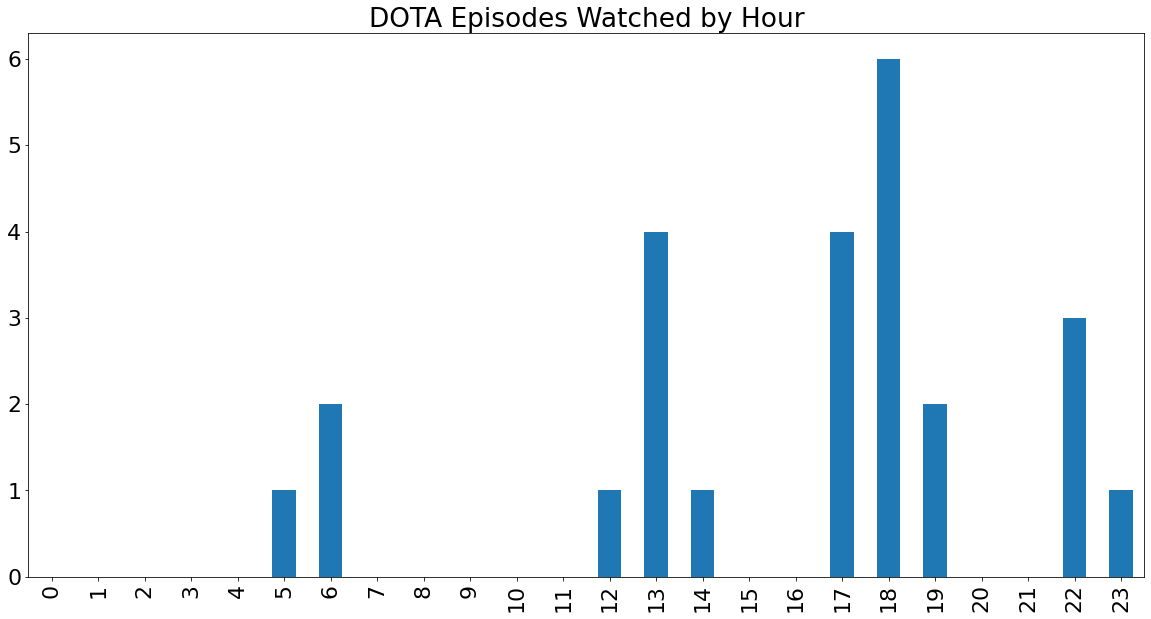

In [26]:
%matplotlib inline
import matplotlib
# set our categorical and define the order so the hours are plotted 0h-23h
show['hour'] = pd.Categorical(show['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create show_by_hour and count the rows for each hour, assigning the result to that variable
show_by_hour = show['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
show_by_hour = show_by_hour.sort_index()

# plot show_by_hour as a bar chart with the listed size and title
matplotlib.rcParams.update({'font.size': 22})
show_by_hour.plot(kind='bar', figsize=(20,10), title=tvshow+' Episodes Watched by Hour')

<AxesSubplot:title={'center':'DOTA Episodes Watched by Day'}>

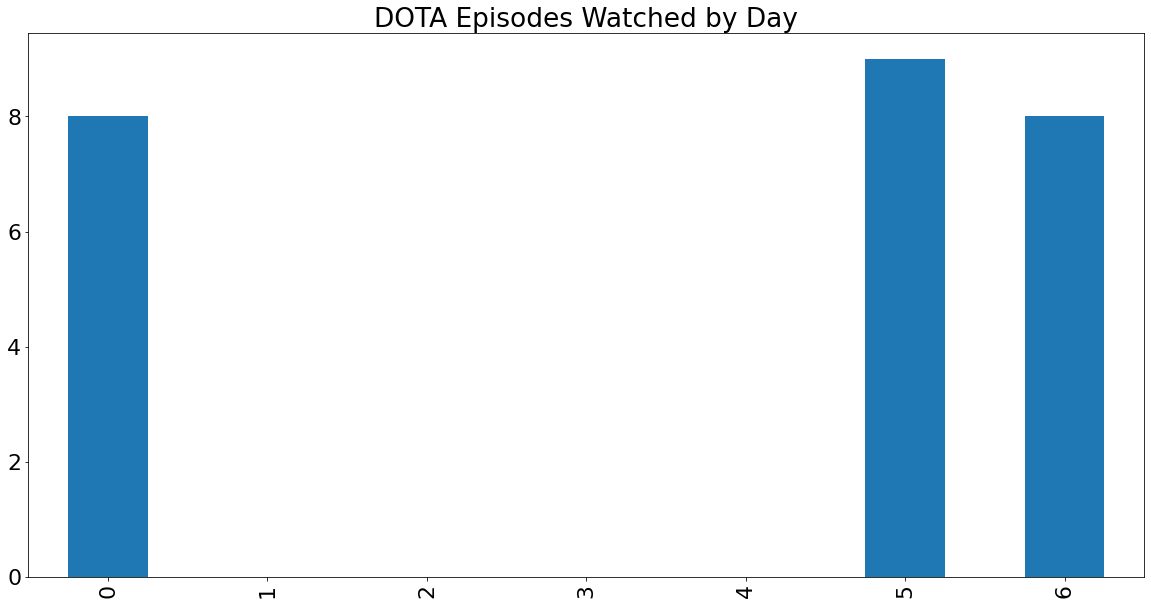

In [27]:
# set our categorical and define the order so the days are plotted Monday-Sunday
show['weekday'] = pd.Categorical(show['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create show_by_day and count the rows for each weekday, assigning the result to that variable
show_by_day = show['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
show_by_day = show_by_day.sort_index()


# plot show_by_day as a bar chart with the listed size and title
matplotlib.rcParams.update({'font.size': 22})
show_by_day.plot(kind='bar', figsize=(20,10), title=tvshow+' Episodes Watched by Day')

<AxesSubplot:title={'center':'DOTA Episodes Watched by month'}>

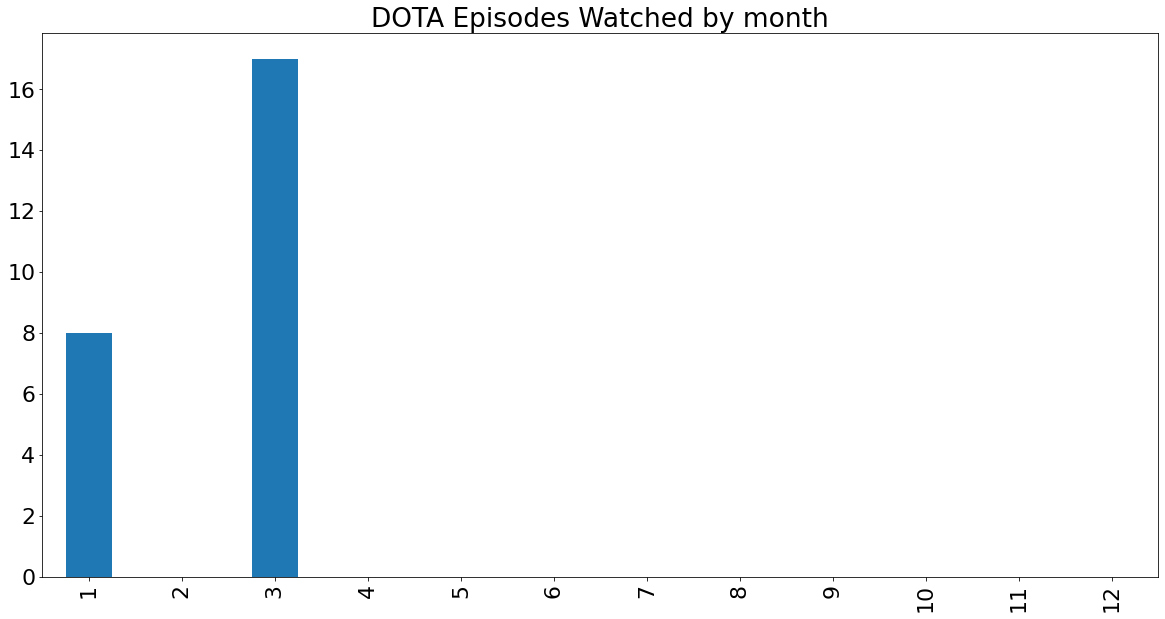

In [28]:
# set our categorical and define the order so the hours are plotted 0-23
show['month'] = pd.Categorical(show['month'], categories=
    [1,2,3,4,5,6,7,8,9,10,11,12],
    ordered=True)

# create show_by_hour and count the rows for each hour, assigning the result to that variable
show_by_month = show['month'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
show_by_month = show_by_month.sort_index()

# plot show_by_month as a bar chart with the listed size and title
show_by_month.plot(kind='bar', figsize=(20,10), title=tvshow+' Episodes Watched by month')

<AxesSubplot:title={'center':'DOTA Episodes Watched by year'}>

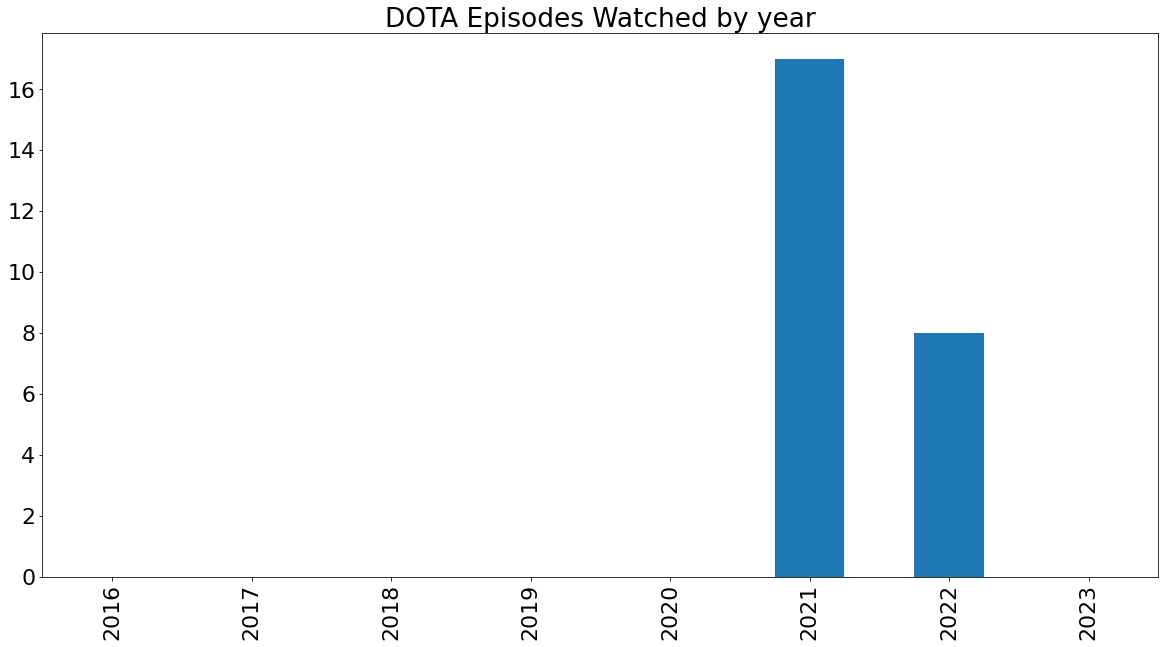

In [29]:
# set our categorical and define the order so the hours are plotted 0-23
show['year'] = pd.Categorical(show['year'], categories=
    [2016,2017,2018,2019,2020,2021,2022,2023],
    ordered=True)

# create show_by_hour and count the rows for each hour, assigning the result to that variable
show_by_year = show['year'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
show_by_year = show_by_year.sort_index()

# plot show_by_year as a bar chart with the listed size and title
show_by_year.plot(kind='bar', figsize=(20,10), title=tvshow+' Episodes Watched by year')

In [30]:
# creation of new column Year Month Week Hour
shows['year'] = shows['Start Time'].dt.year
shows['month'] = shows['Start Time'].dt.month
shows['weekday'] = shows['Start Time'].dt.weekday
shows['hour'] = shows['Start Time'].dt.hour
shows

/var/folders/80/nvpqlt9503b8ttch3g3xwr9m0000gn/T/ipykernel_2885/1047244507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['year'] = shows['Start Time'].dt.year
/var/folders/80/nvpqlt9503b8ttch3g3xwr9m0000gn/T/ipykernel_2885/1047244507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['month'] = shows['Start Time'].dt.month
/var/folders/80/nvpqlt9503b8ttch3g3xwr9m0000gn/T/ipykernel_2885/1047244507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,year,month,weekday,hour
4,2022-02-09 20:58:48+01:00,Jean-ludovic,0 days 00:01:02,<NA>,Bande-annonce : The Privilege,TRAILER,DefaultWidevineAndroidPhone,0 days 00:01:01,00:01:01,FR (France),2022,2,2,20
8,2022-02-09 12:53:49+01:00,Jean-ludovic,0 days 00:48:07,<NA>,All of Us Are Dead: Saison 1: Épisode 3 (Épiso...,<NA>,DefaultWidevineAndroidPhone,0 days 00:56:25,00:56:25,FR (France),2022,2,2,12
10,2022-02-08 14:00:56+01:00,Jean-ludovic,0 days 00:22:54,<NA>,All of Us Are Dead: Saison 1: Épisode 2 (Épiso...,<NA>,DefaultWidevineAndroidPhone,0 days 01:04:19,01:04:19,FR (France),2022,2,1,14
13,2022-02-08 07:43:50+01:00,Jean-ludovic,0 days 00:14:03,<NA>,JoJo's Bizarre Adventure: Stardust Crusaders: ...,<NA>,DefaultWidevineAndroidPhone,0 days 00:00:00,00:00:00,FR (France),2022,2,1,7
14,2022-02-08 05:53:52+01:00,Jean-ludovic,0 days 00:06:13,<NA>,JoJo's Bizarre Adventure: Stardust Crusaders: ...,<NA>,DefaultWidevineAndroidPhone,0 days 00:05:20,00:05:20,FR (France),2022,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25051,2016-09-17 21:59:27+02:00,Jean-ludovic,0 days 00:02:22,<NA>,Teen Wolf: Saison 5: Menace imminente (Épisode...,<NA>,Apple iPhone 6,0 days 00:02:02,Not latest view,FR (France),2016,9,5,21
25053,2016-09-17 21:36:15+02:00,Jean-ludovic,0 days 00:21:01,<NA>,Family Guy: Saison 9: En route pour le pôle No...,<NA>,Apple iPhone 6,0 days 00:21:02,00:21:02,FR (France),2016,9,5,21
25054,2016-09-17 21:08:03+02:00,Jean-ludovic,0 days 00:21:35,<NA>,"Modern Family: Saison 6: Phil, le robot (Épiso...",<NA>,Apple iPhone 6,0 days 00:21:37,00:21:37,FR (France),2016,9,5,21
25056,2016-09-17 20:38:48+02:00,Jean-ludovic,0 days 00:20:51,<NA>,Blue Mountain State: Saison 3: Photos anonymes...,<NA>,Apple iPhone 6,0 days 00:20:52,00:20:52,FR (France),2016,9,5,20


/var/folders/80/nvpqlt9503b8ttch3g3xwr9m0000gn/T/ipykernel_2885/297950107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['weekday'] = pd.Categorical(shows['weekday'], categories=


<AxesSubplot:title={'center':'Netflix shows Episodes Watched by Day'}>

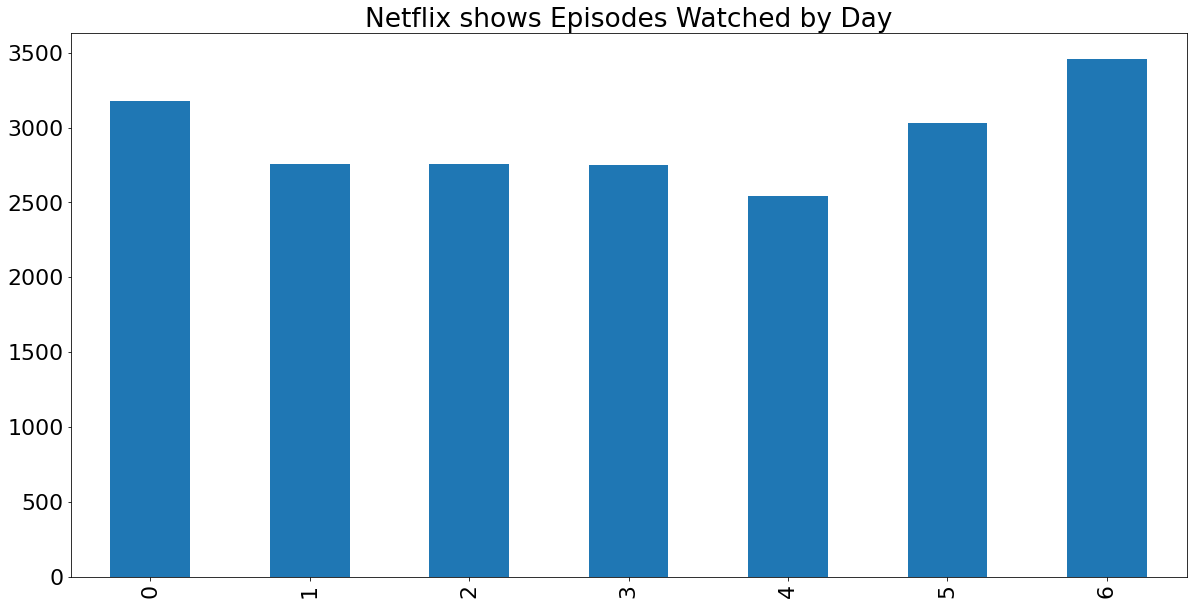

In [31]:
# set our categorical and define the order so the days are plotted Monday-Sunday
shows['weekday'] = pd.Categorical(shows['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create show_by_day and count the rows for each weekday, assigning the result to that variable
shows_by_day = shows['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
shows_by_day = shows_by_day.sort_index()
# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot shows_by_day as a bar chart with the listed size and title
shows_by_day.plot(kind='bar', figsize=(20,10), title='Netflix shows Episodes Watched by Day')

/var/folders/80/nvpqlt9503b8ttch3g3xwr9m0000gn/T/ipykernel_2885/3062132087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['hour'] = pd.Categorical(shows['hour'], categories=


<AxesSubplot:title={'center':'Netflix shows Episodes Watched by Hour'}>

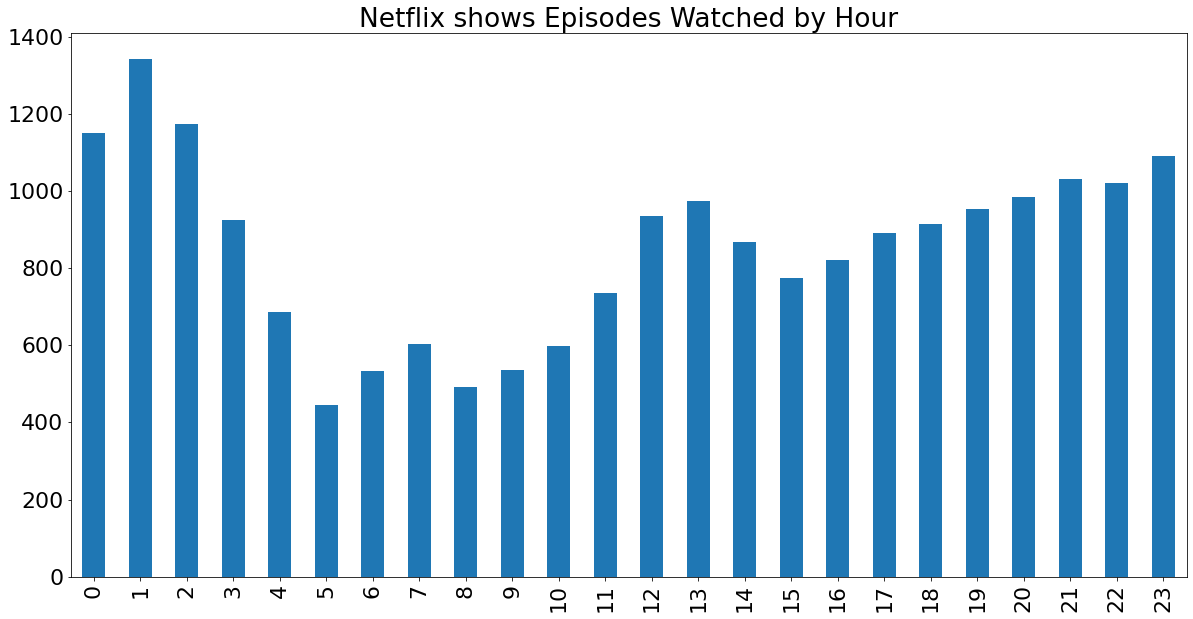

In [32]:
# set our categorical and define the order so the hours are plotted 0-23
shows['hour'] = pd.Categorical(shows['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create show_by_hour and count the rows for each hour, assigning the result to that variable
shows_by_hour = shows['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
shows_by_hour = shows_by_hour.sort_index()

# plot shows_by_hour as a bar chart with the listed size and title
shows_by_hour.plot(kind='bar', figsize=(20,10), title='Netflix shows Episodes Watched by Hour')

/var/folders/80/nvpqlt9503b8ttch3g3xwr9m0000gn/T/ipykernel_2885/3440177703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['month'] = pd.Categorical(shows['month'], categories=


<AxesSubplot:title={'center':'Netflix shows Episodes Watched by month'}>

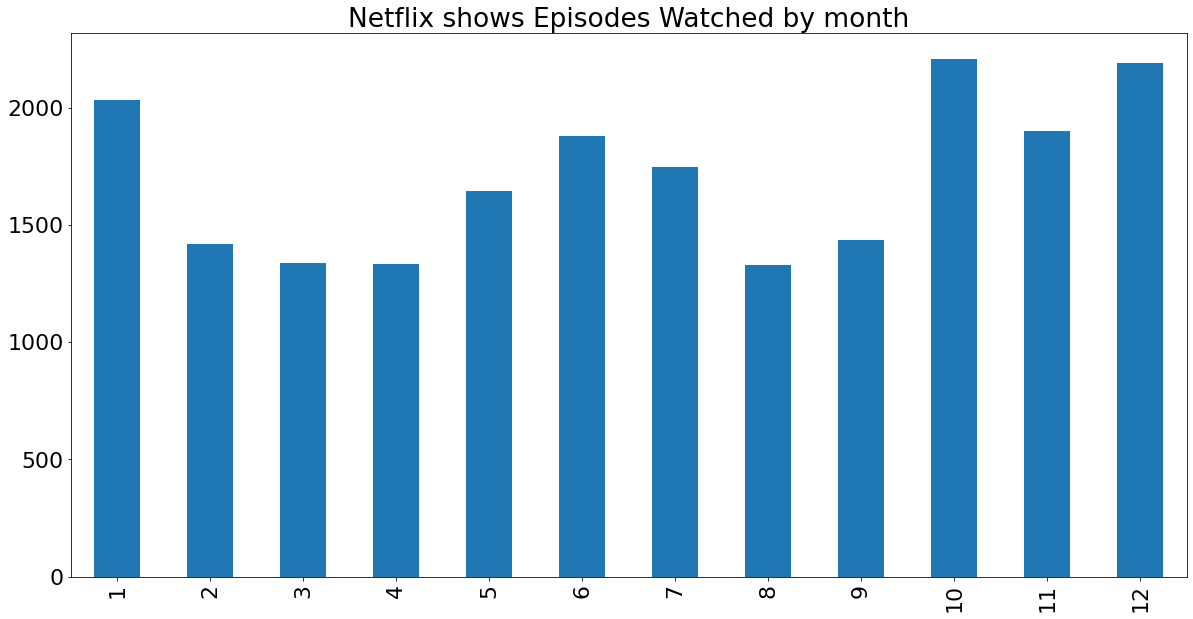

In [33]:
# set our categorical and define the order so the hours are plotted 0-23
shows['month'] = pd.Categorical(shows['month'], categories=
    [1,2,3,4,5,6,7,8,9,10,11,12],
    ordered=True)

# create show_by_hour and count the rows for each hour, assigning the result to that variable
shows_by_month = shows['month'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
shows_by_month = shows_by_month.sort_index()

# plot shows_by_month as a bar chart with the listed size and title
shows_by_month.plot(kind='bar', figsize=(20,10), title='Netflix shows Episodes Watched by month')

/var/folders/80/nvpqlt9503b8ttch3g3xwr9m0000gn/T/ipykernel_2885/4236612065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['year'] = pd.Categorical(shows['year'], categories=


<AxesSubplot:title={'center':'Netflix shows Episodes Watched by year'}>

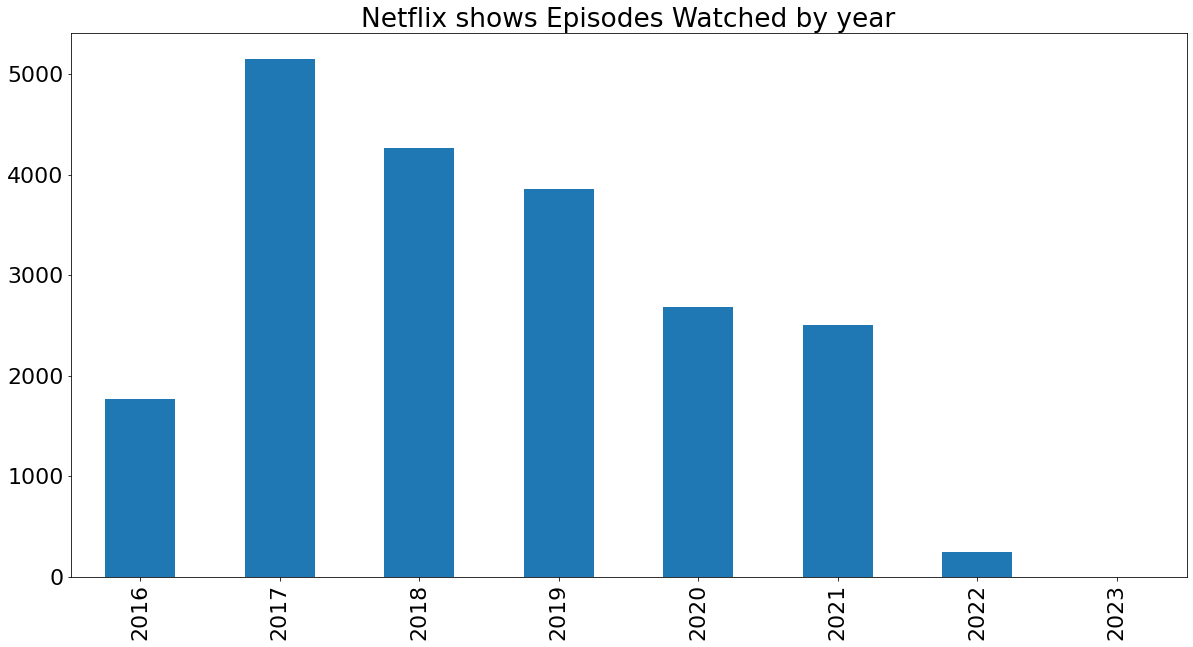

In [34]:
# set our categorical and define the order so the hours are plotted 0-23
shows['year'] = pd.Categorical(shows['year'], categories=
    [2016,2017,2018,2019,2020,2021,2022,2023],
    ordered=True)

# create show_by_hour and count the rows for each hour, assigning the result to that variable
shows_by_year = shows['year'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
shows_by_year = shows_by_year.sort_index()

# plot shows_by_year as a bar chart with the listed size and title
shows_by_year.plot(kind='bar', figsize=(20,10), title='Netflix shows Episodes Watched by year')

<AxesSubplot:title={'center':'DOTA VS SHOWS'}>

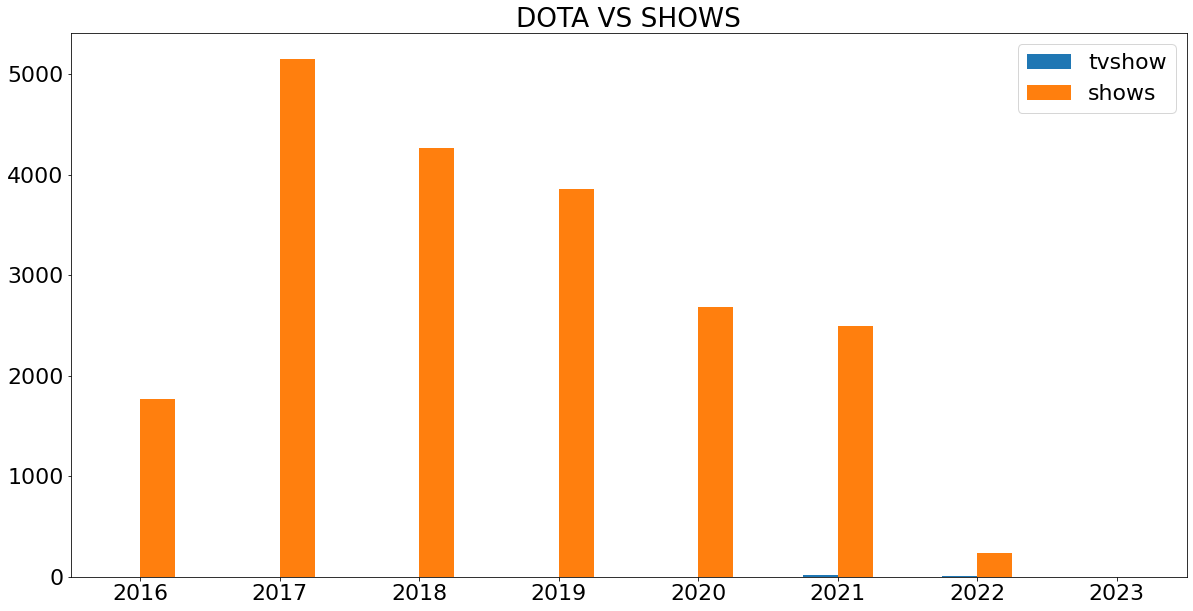

In [35]:
index = [2016,2017,2018,2019,2020,2021,2022,2023]
dd=pd.DataFrame({'tvshow': show_by_year,'shows': shows_by_year}, index=index)
# plot show_by_year and shows_by_year as a bar chart with the listed size and title
dd.plot.bar(rot=0, figsize=(20,10), title=tvshow+' VS SHOWS')

/var/folders/80/nvpqlt9503b8ttch3g3xwr9m0000gn/T/ipykernel_2885/1027532050.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deviceps4['year'] = deviceps4['Start Time'].dt.year
/var/folders/80/nvpqlt9503b8ttch3g3xwr9m0000gn/T/ipykernel_2885/1027532050.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deviceandroid['year'] = deviceandroid['Start Time'].dt.year
/var/folders/80/nvpqlt9503b8ttch3g3xwr9m0000gn/T/ipykernel_2885/1027532050.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy o

<AxesSubplot:title={'center':'Device used'}>

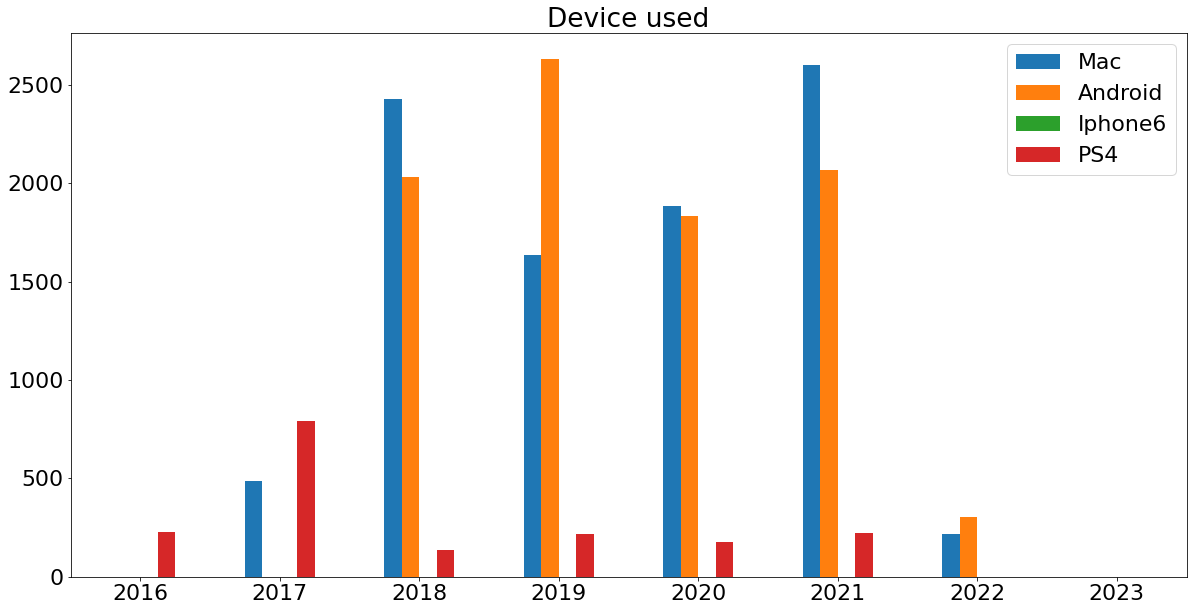

In [36]:
# initialization 
index = [2016,2017,2018,2019,2020,2021,2022,2023]
deviceiphone6 = df[df['Device Type'].str.contains('Iphone6', regex=False)]
devicemac = df[df['Device Type'].str.contains('MAC', regex=False)]
deviceandroid = df[df['Device Type'].str.contains('Android', regex=False)]
deviceps4 = df[df['Device Type'].str.contains('PS4', regex=False)]
deviceps4['year'] = deviceps4['Start Time'].dt.year
deviceps4_by_year = deviceps4['year'].value_counts()
deviceandroid['year'] = deviceandroid['Start Time'].dt.year
deviceandroid_by_year = deviceandroid['year'].value_counts()
deviceiphone6['year'] = deviceiphone6['Start Time'].dt.year
deviceiphone6_by_year = deviceiphone6['year'].value_counts()
devicemac['year'] = devicemac['Start Time'].dt.year
devicemac_by_year= devicemac['year'].value_counts()
dd=pd.DataFrame({'Mac':devicemac_by_year,'Android':deviceandroid_by_year,'Iphone6':deviceiphone6_by_year,'PS4':deviceps4_by_year}, index=index)
# plot 'Mac':devicemac_by_year,'Android':deviceandroid_by_year,'Iphone6':deviceiphone6_by_year
# #'PS4':deviceps4_by_year as a bar chart with the listed size and title
dd.plot.bar(rot=0, figsize=(20,10), title='Device used')